In [2]:
import numpy as np
import pyxdf
import matplotlib.pyplot as plt
from scipy import signal, fftpack


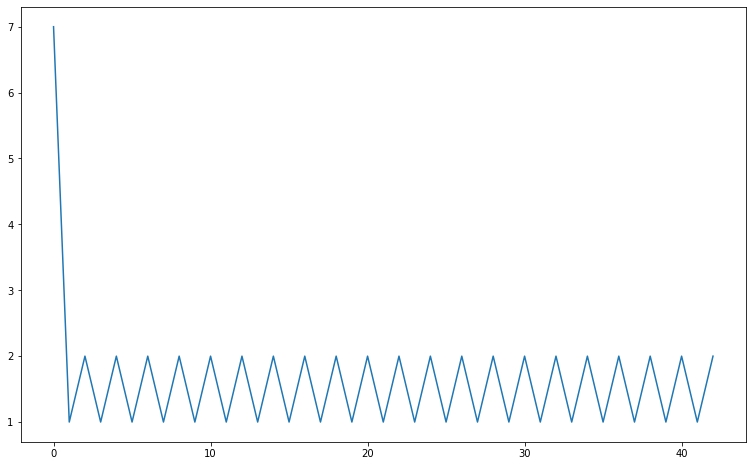

In [3]:
data, header=  pyxdf.load_xdf('test_marker.xdf')

for stream in data:
    y = stream['time_series']

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.figure(figsize=(13,8))
        plt.plot(stream['time_stamps'][:], y[:])
    else:
        raise RuntimeError('Unknown stream format')



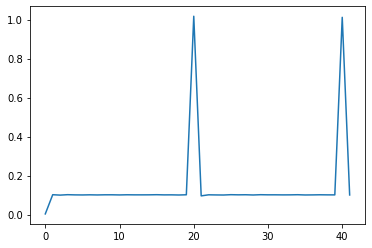

In [152]:
diff_ts = np.diff(stream['time_stamps'])
plt.plot(diff_ts[:])
# each flick should have a time difference of 100ms. 1000ms/10hz = 100ms diff... 
# 100ms / 1000ms = 0.1second


In [257]:
print(stream['time_stamps'][:])
print(diff_ts)

[2311.97168035 2311.97497002 2312.07672736 2312.17643283 2312.27831442
 2312.37920864 2312.47973386 2312.58096666 2312.68152567 2312.78280148
 2312.88414065 2312.98475237 2313.08617951 2313.18722656 2313.28823374
 2313.38941762 2313.49119434 2313.5921111  2313.69318007 2313.79349212
 2313.89490151 2314.91166365 2315.00746483 2315.10870884 2315.20932735
 2315.30956557 2315.41141925 2315.51257801 2315.61413931 2315.71453199
 2315.81632367 2315.9174988  2316.01873781 2316.11959557 2316.22062571
 2316.32233522 2316.42279402 2316.52361574 2316.62502838 2316.72601209
 2316.82690177 2317.83813688 2317.93852801]
[0.00328967 0.10175734 0.09970547 0.10188159 0.10089422 0.10052522
 0.1012328  0.10055901 0.1012758  0.10133918 0.10061172 0.10142714
 0.10104705 0.10100718 0.10118388 0.10177672 0.10091676 0.10106897
 0.10031205 0.10140939 1.01676214 0.09580118 0.10124401 0.10061851
 0.10023822 0.10185368 0.10115876 0.1015613  0.10039268 0.10179168
 0.10117514 0.10123901 0.10085776 0.10103014 0.101709

(0.0, 30.0)

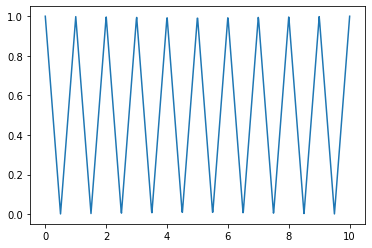

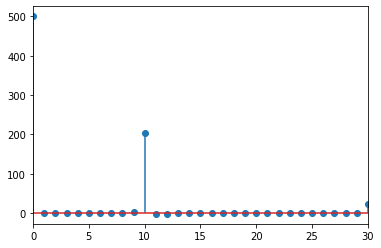

In [245]:

time=np.linspace(0, 10, 1000)
# print(time)
freq=1
tri=np.abs(signal.sawtooth(2 * np.pi * freq * time)) 
plt.plot(time,tri)


fou = fftpack.fft(tri)
freqs = fftpack.fftfreq(tri.shape[0]) * 1000

plt.figure()
plt.stem(freqs, fou.real)
plt.xlim(0,30)

